# Setup

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import os.path as path

root_path = "/content/drive/MyDrive/DFS/pu/thesis/the_new_one/survival"
data_path = path.join(root_path, 'data')

!ls $data_path

comment.zip		       df_final.gsheet	   df_numeric_aug.csv	      df_numeric.csv
df_aspect_analysis_expand.csv  df_final_kmean.csv  df_numeric_augment.csv     pu.csv
df_final.csv		       df_imb.csv	   df_numeric_augment.gsheet


In [4]:
import pandas as pd

df = pd.read_csv(path.join(data_path, 'df_numeric_augment.csv'))
df

,Unnamed: 0,price,competitors,review_length,customer_engagement,rating,num_reviews,open_date_days,observer_date_days,avg_a_food,avg_a_service,avg_a_atmosphere,survival_duration_days,closed
0,0,1.0,56.927835,188.115819,13.329897,4.2,3.649485,1279.0,3013.0,4.353535,4.393939,4.313131,2922.0,1
1,1,0.0,64.575000,163.935065,11.100000,3.5,3.850000,1826.0,3044.0,3.769231,3.782051,3.833333,2406.0,1
2,2,1.0,63.463415,104.250000,7.707317,3.6,3.268293,1734.0,3013.0,4.019231,4.000000,4.134615,2467.0,1
3,3,1.0,52.000000,132.746667,142.500000,4.7,37.500000,2374.0,1217.0,4.800000,4.800000,4.650000,31.0,1
4,4,0.0,72.000000,115.480000,5.225806,4.4,1.209677,2374.0,3044.0,4.500000,4.625000,4.375000,1858.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,310,1.0,31.236842,118.014925,3.868421,3.9,2.644737,1948.0,3044.0,3.840000,3.920000,4.000000,2284.0,1
311,311,1.0,46.142857,158.208054,488.857143,4.9,63.857143,4048.0,3044.0,4.744770,4.794979,4.778243,184.0,0
312,312,1.0,14.275862,102.470990,21.517241,4.1,10.103448,1369.0,1033.0,4.361702,4.468085,4.446809,852.0,0
313,313,1.0,32.041667,230.902256,17.888889,4.4,3.694444,2071.0,3044.0,4.354167,4.541667,4.520833,2161.0,1


# Aug data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              315 non-null    int64  
 1   price                   315 non-null    float64
 2   competitors             315 non-null    float64
 3   review_length           315 non-null    float64
 4   customer_engagement     315 non-null    float64
 5   rating                  315 non-null    float64
 6   num_reviews             315 non-null    float64
 7   open_date_days          315 non-null    float64
 8   observer_date_days      315 non-null    float64
 9   avg_a_food              315 non-null    float64
 10  avg_a_service           315 non-null    float64
 11  avg_a_atmosphere        315 non-null    float64
 12  survival_duration_days  315 non-null    float64
 13  closed                  315 non-null    int64  
dtypes: float64(12), int64(2)
memory usage: 34.

In [8]:
df.describe()

,Unnamed: 0,price,competitors,review_length,customer_engagement,rating,num_reviews,open_date_days,observer_date_days,avg_a_food,avg_a_service,avg_a_atmosphere,survival_duration_days,closed
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,157.000000,0.828571,49.148863,129.934474,34.411620,4.303492,8.162972,2592.447619,2946.685714,4.435264,4.416157,4.417380,1536.664327,0.415873
std,91.076891,0.519501,25.746316,48.162276,64.120756,0.401058,11.896937,986.578069,347.573746,0.354841,0.387520,0.358001,970.712182,0.493656
min,0.000000,0.000000,0.000000,46.282051,1.937008,3.000000,1.186441,0.000000,0.000000,3.075000,2.875000,2.850000,31.000000,0.000000
25%,78.500000,1.000000,28.649425,92.664691,6.580569,4.100000,2.602198,1734.000000,2983.000000,4.233333,4.211089,4.210227,611.000000,0.000000
50%,157.000000,1.000000,53.485714,122.872928,12.887500,4.300000,3.696203,2587.000000,3013.000000,4.482759,4.464286,4.451613,1492.000000,0.000000
75%,235.500000,1.000000,71.064805,158.460214,28.444586,4.600000,8.011330,3546.000000,3044.000000,4.704839,4.685432,4.655172,2375.000000,1.000000
max,314.000000,3.000000,94.000000,276.244898,488.857143,5.000000,80.666667,4140.000000,3044.000000,5.000000,5.000000,5.000000,4201.000000,1.000000


In [11]:
df['price'].unique()

array([1., 0., 3., 2.])

<Axes: xlabel='price'>

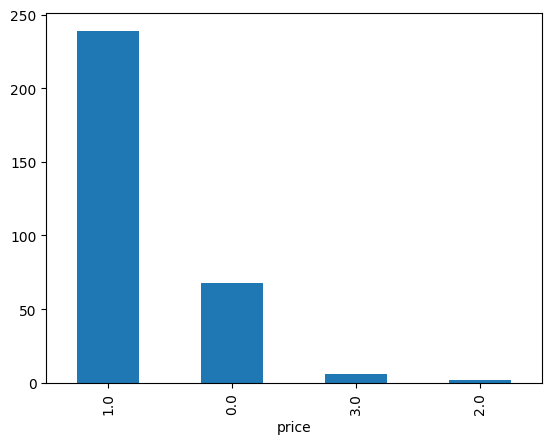

In [9]:
df['price'].value_counts().plot(kind='bar')

<Axes: xlabel='rating', ylabel='Count'>

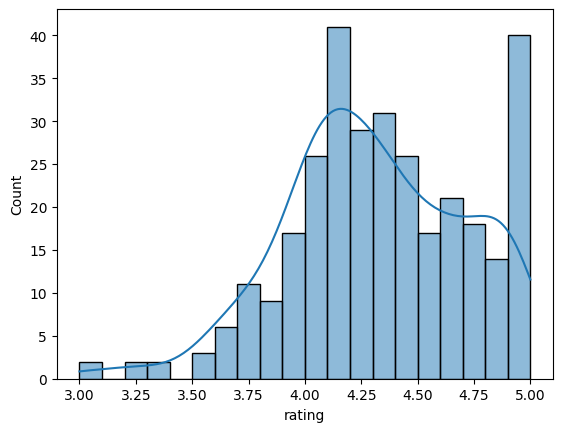

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['rating'], bins=20, kde=True)

<Axes: xlabel='price', ylabel='rating'>

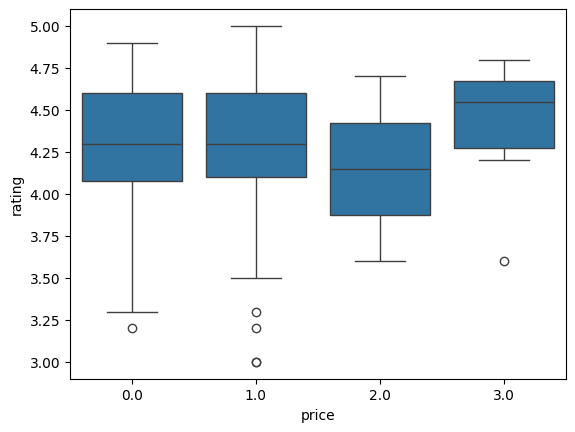

In [14]:
sns.boxplot(x='price', y='rating', data=df)

<Axes: xlabel='customer_engagement', ylabel='num_reviews'>

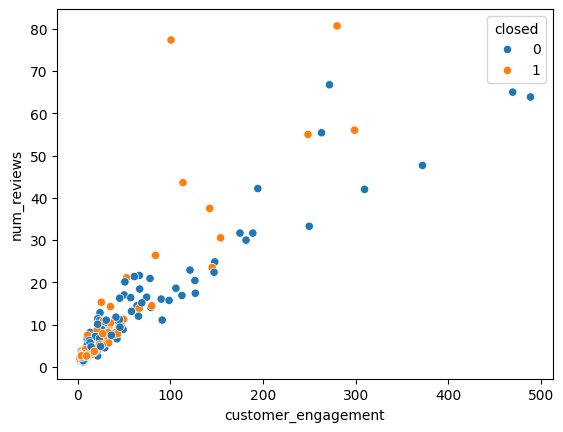

In [15]:
sns.scatterplot(x='customer_engagement', y='num_reviews', hue='closed', data=df)

# un-numeric data

In [19]:
df_final = pd.read_csv(path.join(data_path, 'df_final.csv'))
df_final

,place_id,area,price,rating,open_date,closed,observer_date,competitors,review_length,customer_engagement,avg_a_food,avg_a_service,avg_a_atmosphere,num_reviews,survival_duration,survival_duration_days,open_date_days,observer_date_days
0,ChIJbUyNjrMudTERqgIdNSsFI_o,Tân Bình,1.0,4.2,2016-12-01,0,2024-12-01,56.927835,188.115819,13.329897,4.353535,4.393939,4.313131,3.649485,2922 days,2922.0,1279.0,3013.0
1,ChIJjYR_WTUpdTERMxpUaVfR3YA,Tân Bình,0.0,3.5,2018-06-01,0,2025-01-01,64.575000,163.935065,11.100000,3.769231,3.782051,3.833333,3.850000,2406 days,2406.0,1826.0,3044.0
2,ChIJRWC4yzUpdTEReck_6zx684A,Tân Bình,1.0,3.6,2018-03-01,0,2024-12-01,63.463415,104.250000,7.707317,4.019231,4.000000,4.134615,3.268293,2467 days,2467.0,1734.0,3013.0
3,ChIJobG_3GEpdTERqwfaNVhRuZo,Tân Bình,1.0,4.7,2019-12-01,1,2020-01-01,52.000000,132.746667,142.500000,4.800000,4.800000,4.650000,37.500000,31 days,31.0,2374.0,1217.0
4,ChIJ7ZI85J8pdTER5dAHkKHoFkM,Tân Bình,0.0,4.4,2019-12-01,0,2025-01-01,72.000000,115.480000,5.225806,4.500000,4.625000,4.375000,1.209677,1858 days,1858.0,2374.0,3044.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,ChIJ10cIO6wudTEReShSv4xHgQk,Tân Phú,1.0,3.9,2018-10-01,0,2025-01-01,31.236842,118.014925,3.868421,3.840000,3.920000,4.000000,2.644737,2284 days,2284.0,1948.0,3044.0
311,ChIJn5vZFmEvdTERbY3mm-4iORc,Tân Phú,1.0,4.9,2024-07-01,0,2025-01-01,46.142857,158.208054,488.857143,4.744770,4.794979,4.778243,63.857143,184 days,184.0,4048.0,3044.0
312,ChIJnyYMi60udTERtZ1ueQ18OQs,Tân Phú,1.0,4.1,2017-03-01,1,2019-07-01,14.275862,102.470990,21.517241,4.361702,4.468085,4.446809,10.103448,852 days,852.0,1369.0,1033.0
313,ChIJLYdQ4QYvdTERFS_e0B3LGAY,Tân Phú,1.0,4.4,2019-02-01,0,2025-01-01,32.041667,230.902256,17.888889,4.354167,4.541667,4.520833,3.694444,2161 days,2161.0,2071.0,3044.0


In [20]:
# forced data type
df_final['price'] = df_final['price'].astype(float)
df_final['rating'] = df_final['rating'].astype(float)
df_final['num_reviews'] = df_final['num_reviews'].astype(int)
df_final['customer_engagement'] = df_final['customer_engagement'].astype(int)
df_final['closed'] = df_final['closed'].astype(int)
df_final['survival_duration_days'] = df_final['survival_duration_days'].astype(int)
df_final

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   place_id                315 non-null    object 
 1   area                    315 non-null    object 
 2   price                   315 non-null    float64
 3   rating                  315 non-null    float64
 4   open_date               315 non-null    object 
 5   closed                  315 non-null    int64  
 6   observer_date           315 non-null    object 
 7   competitors             315 non-null    float64
 8   review_length           315 non-null    float64
 9   customer_engagement     315 non-null    float64
 10  avg_a_food              315 non-null    float64
 11  avg_a_service           315 non-null    float64
 12  avg_a_atmosphere        315 non-null    float64
 13  num_reviews             315 non-null    float64
 14  survival_duration       315 non-null    ob

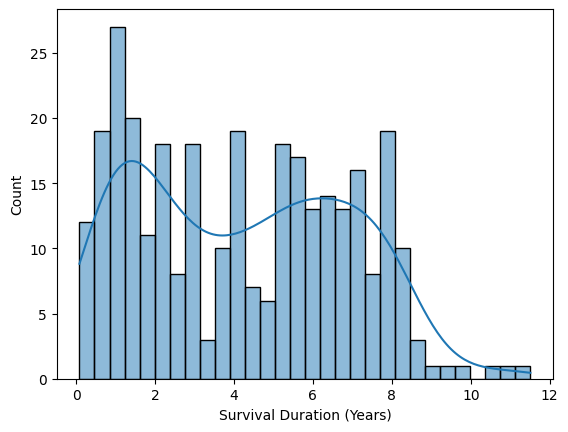

In [22]:
sns.histplot(df['survival_duration_days']/365, bins=30, kde=True)
plt.xlabel('Survival Duration (Years)')
plt.show()

<Axes: xlabel='closed', ylabel='open_date_days'>

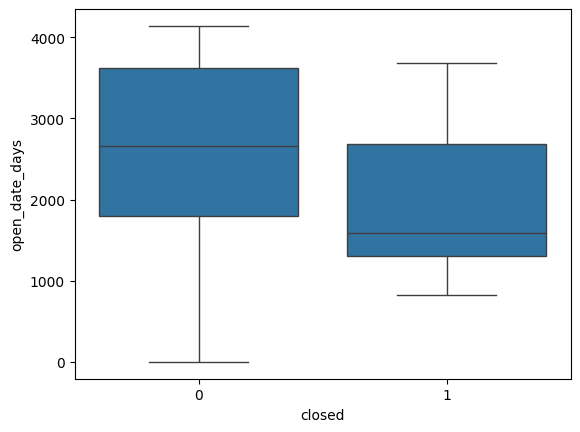

In [24]:
sns.boxplot(x='closed', y='open_date_days', data=df_final)

In [29]:
df_final['engagement_per_review'] = df_final['customer_engagement'] / df_final['num_reviews']
df_final['survival_years'] = df_final['survival_duration_days'] / 365

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'competitors'}>,
        <Axes: title={'center': 'review_length'}>],
       [<Axes: title={'center': 'customer_engagement'}>,
        <Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'num_reviews'}>,
        <Axes: title={'center': 'open_date_days'}>],
       [<Axes: title={'center': 'observer_date_days'}>,
        <Axes: title={'center': 'avg_a_food'}>,
        <Axes: title={'center': 'avg_a_service'}>,
        <Axes: title={'center': 'avg_a_atmosphere'}>],
       [<Axes: title={'center': 'survival_duration_days'}>,
        <Axes: title={'center': 'closed'}>,
        <Axes: title={'center': 'engagement_per_review'}>,
        <Axes: title={'center': 'survival_years'}>]], dtype=object)

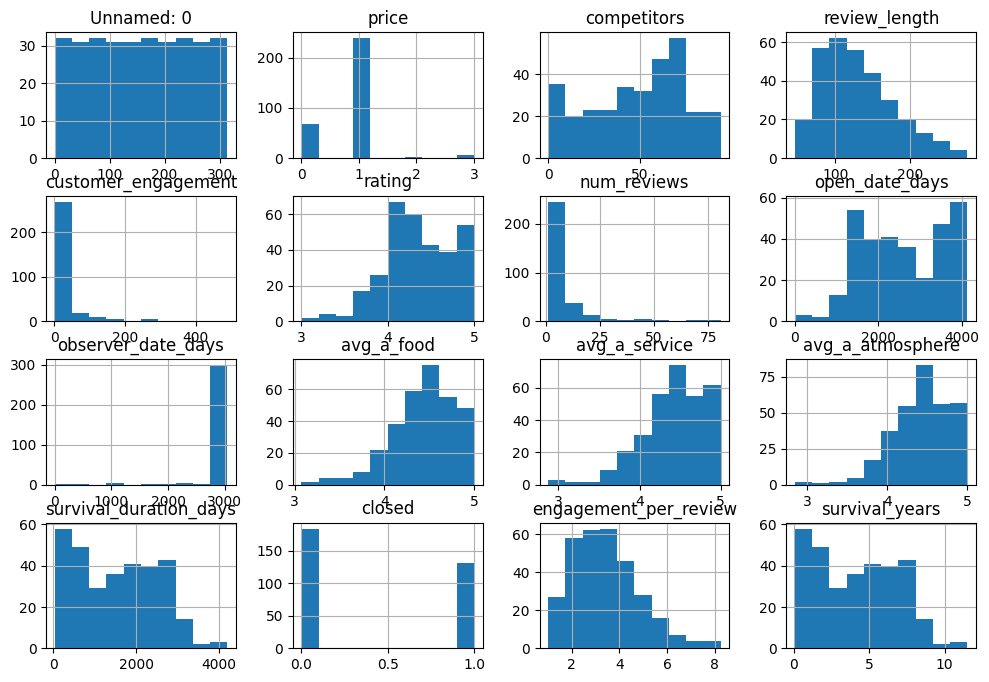

In [30]:
df.hist(figsize=(12, 8))

<Axes: xlabel='closed', ylabel='rating'>

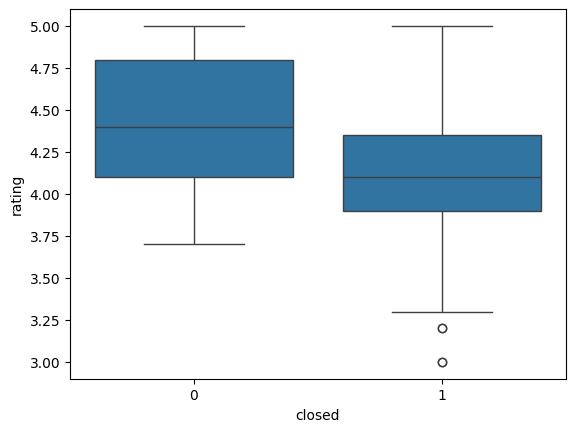

In [39]:
sns.boxplot(x=df['closed'], y=df_final['rating'])

In [40]:
sns.pairplot(df, hue="closed")

Output hidden; open in https://colab.research.google.com to view.

<Axes: xlabel='rating', ylabel='customer_engagement'>

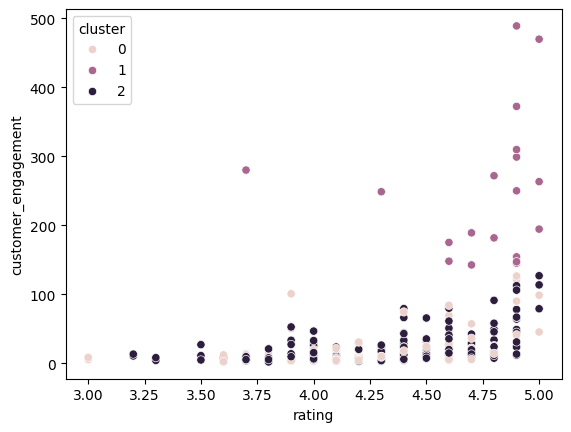

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['rating', 'customer_engagement', 'competitors']])
sns.scatterplot(x=df['rating'], y=df['customer_engagement'], hue=df['cluster'])

In [46]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=2527b43916d8ce71a83b46b5d6b66a79b7e676a04d561e545ce50d8eee1d1370
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


<Axes: xlabel='timeline'>

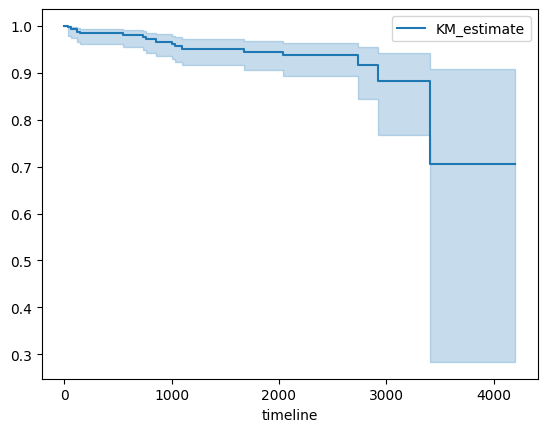

In [50]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(df_final['survival_duration_days'], event_observed=df_final['closed'])
kmf.plot()